(sec:poisson)=
# Poisson-Verteilung

Hier lernen wir eine diskrete Verteilung kennen die *unendlich viele* verschiedene Werte annehmen kann. Da auch hier gelten soll, dass die Summe der Einzelwahrscheinlichkeiten 1 ergibt, müssen die allermeinsten dieser Zahlen super klein sein - fast Null. Schauen wir uns das in der Definiton an.

## Definition

:::{admonition} Definition
:class: definition

Es sei $\lambda>0$ eine reelle Zahl. Ist $X$ eine Zufallsvariable, welche die Werte $0,1,2,\dots$ annehmen kann und für welche

$$\mathbb P(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}$$

gilt, so heißt $X$ **Poisson-verteilt** mit Parameter $\lambda$. Wir schreiben dann 

$$X\sim\mathrm{Poi}(\lambda)$$

:::

Man kann zeigen, dass die **unendliche Summe** über $\mathbb P(X=k)$ über alle $k$, gleich 1 ist, also dass

$$ \sum_{k=0}^\infty  \frac{\lambda^k}{k!}e^{-\lambda} = 1 $$

gilt.

## Anwendung

Es folgen Beipiele in denen typischerweise eine Modellierung mit der Poissonverteilung sinnvoll ist.

- **Anrufe bei einer Hotline:** Die Anzahl der Anrufe pro Stunde bei einer Kundenhotline folgt oft einer Poisson-Verteilung, wenn die Anrufe zufällig und unabhängig voneinander eintreffen.
- **Eingehende E-Mails pro Stunde:** Die Anzahl der E-Mails, die ein Unternehmen pro Stunde erhält, kann mit einer Poisson-Verteilung modelliert werden, wenn die Ankünfte zufällig sind.
- **Verkehrsunfälle:** Die Anzahl der Verkehrsunfälle an einer bestimmten Kreuzung pro Woche kann typischerweise mit einer Poisson-Verteilung beschrieben werden.
- **Maschinenausfälle:** Wenn Maschinen unabhängig voneinander und selten ausfallen, kann die Anzahl der Ausfälle pro Monat Poisson-verteilt sein.
- **Tippfehler in einer Buchseite:** Die Anzahl der Tippfehler auf einer einzelnen Seite eines Buchs kann einer Poisson-Verteilung folgen, wenn Fehler zufällig verteilt sind.

Wir sehen, meist zählt die Poissonverteilung bestimmte **Ereignisse pro Zeiteinheit**. (Beim Beispiel mit den Tippfehlern, kann man das auch so interpretieren, wenn man annimmt, dass auf jeder Seite etwa gleich viele Buchstaben stehen und die Geschwindigkeit beim Tippen Konstant war).

In den Erläuterungen der Beispiele steht oft "typischerweise" oder "kann Poisson-verteilt sein". Diese etwas weichen Formulierungen liegen daran, dass präzisere Annahmen getroffen werden müssen um sicher von der Poisson-Verteilung ausgehen zu können. Dies lauten wie folgt:

- **Einzelereignisse:** Zwei Ereignisse können nicht **genau** zum gleichen Zeitpunkt eintreten. Es ist immer ein (wenn auch minimaler) Zeitraum zwischen zwei Ereignissen.
- **Proportionalität:** Die Wahrscheinlichkeit, dass ein Ereignis in einem bestimmten Zeitraum auftritt, ist proportional zur Länge dieses Zeitraums.
- **Homogenität:** Die Wahrscheinlichkeit, ein Ereignis in einem bestimmten Zeitraum zu beobachten, ist unabhängig von der Lage des Zeitraums (sondern nur abhängig von der Länge des Zeitraums).
- **Unabhängigkeit:** Betrachten wir Zeiträume A und B, so gilt: falls diese sich nicht überlappen, so sind *"in A tritt ein Ereigniss ein"* und *"in B tritt ein Ereigniss ein"* stochastisch unabhängig.

## Eigenschaften

Sei $X\sim \mathrm{Poi}(\lambda)$ mit $\lambda>0$, so gilt

**Erwartungswert**

$$\mathbb E(X)= \lambda$$

**Varianz**

$$\mathrm{Var}(X) = \lambda$$

**Stabdiagramm**

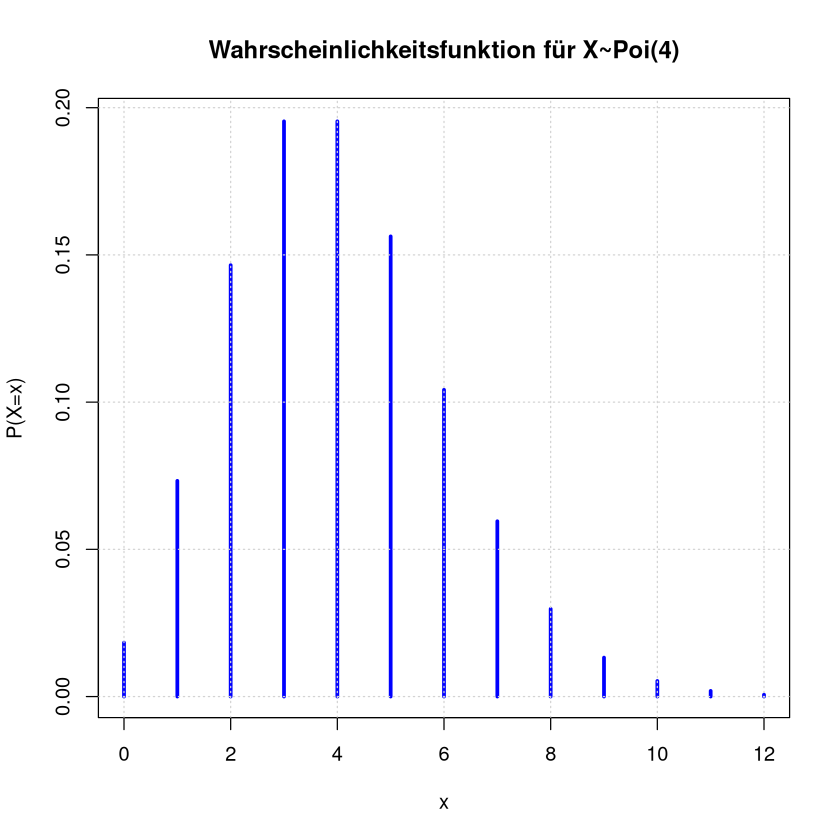

In [2]:
lambda <- 4
n      <- 12       # Anzahl der Werte die angezeigt werden sollen
probs  <- dpois(0:n,lambda)

title <- paste("Wahrscheinlichkeitsfunktion für X~Poi(4)")
plot(0:n, y = probs, col = "blue", type = "h", lwd = 3,
     main = title, ylab = "P(X=x)", xlab = "x")
grid()

**Verteilungsfunktion**

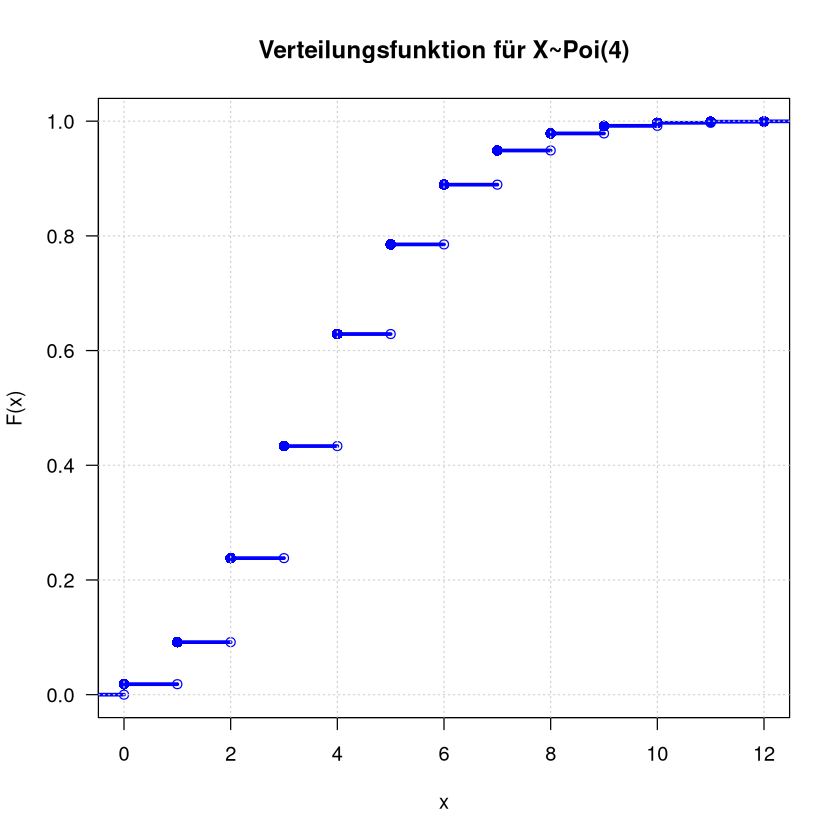

In [5]:
plot.dcdf <- function(x, prob , col="blue", lwd=3, ...) {
  y   <- c(0,cumsum(prob))
  cdf <- stepfun(x=x, y=y, right=TRUE)
  plot(cdf, verticals=FALSE,
       lwd=lwd, col=col, las=1, 
       xlab="x", ylab="F(x)", ...)
  points(x,cumsum(prob),pch = 16, col=col, cex=1.2)
}
title <- paste("Verteilungsfunktion für X~Poi(4)" )
plot.dcdf(0:12, probs, main=title, xlim=c(0,12))
grid()


## Beispiel

:::{admonition} Beispiel
:class: beispiel

Die Anzahl der Notrufe bei einem Schlüsseldienst sei Poisson-verteilt. Im Mittel gehen pro Tag 4 Notrufe ein. 

1. Wie groß ist die Wahrscheinlichkeit, dass morgen genau 5 Notrufe eingehen?

2. Wie groß ist die Wahrscheinlichkeit, dass morgen mindestens 3 Notrufe eingehen?

**Lösung:**

Zuerst: **Definition der Zufallsvariable**

$X$... Anzahl der Notrufe pro Tag

Gegeben ist: $X\sim \mathrm{Poi}(\lambda)\quad $ und $ \quad \mathbb E(X)=4$

Wegen $\mathbb E(X)=\lambda$ ist $\lambda=4$.

- zu 1.: gesucht ist $\mathbb P(X=5)$
   
   $$\mathbb P(X=5) = \frac{\lambda^k}{k!}\mathrm{e}^{-\lambda}=\frac{4^5}{5!}\mathrm{e}^{-4}=0.15629$$
   
- zu 2.: gesucht ist $\mathbb P(X\geq 3)$

  $$\begin{align*}\mathbb P(X\geq 3)&=1-\mathbb P(X\leq 2) \\
  &= 1-(\mathbb P(X= 0)+\mathbb P(X= 1)+\mathbb P(X= 2)) \\
  &= 1-(\frac{4^0}{0!}\mathrm{e}^{-4}+\frac{4^1}{1!}\mathrm{e}^{-4}+\frac{4^2}{2!}\mathrm{e}^{-4}) \\ 
  &= 0.76190
  \end{align*}$$

:::


## Umsetzung mit R

Wir nutzen die Funktionen `dpois` für die Dichte und `ppois` für die Verteilungsfunktion. Die Verwendung zeigen wir anhand der Berechnungen des Beispiels:

In [14]:
# Lösung zu 1. mit dpois
dpois(5,lambda = 4)
# Formel selbst eingegegeben
4^5/factorial(5) *exp(-4)

# Lösung zu 2. mit ppois
1-ppois(2,lambda = 4)
# Lösung zu 2. mit dpois
1-(dpois(0,lambda = 4)+dpois(1,lambda = 4)+dpois(2,lambda = 4))

[1] 0.1562935

[1] 0.1562935

[1] 0.7618967

[1] 0.7618967

Wir können auch Poisson-verteilte Zufallszahlen erzeugen. Dazu nutzen wir die Funktion `rpois`:

In [13]:
set.seed(139)       # Setzt den Startpunkt für die Erzeugung der Pseudozufallszahlen 
                    # Zahl kann beliebig gewählt werden. 
                    # Sorgt dafür, dass der "Zufall" immer die gleichen Ergebnisse liefert.
rpois(20,lambda = 4)

[1] 5 6 4 8 1 4 3 4 2 5 1 2 3 3 6 4 2 3 3 2